# Sentiment Analysis of Twitter Data

**Note: you need a Twitter developer account in order to execute the following code**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load credentials from json file
# For this to work, you need your own credentials file
import json
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)

**The Structure of a Tweet**

There are various components of a tweet that you can use to extract information:

* User Name: This is how each unique user is identified.
* Time Stamp: When the tweet was sent.
* Tweet Text: The body of the tweet - needs to be 140 characters of less!
* Hashtags: Always proceeded by a # symbol. A hashtag is often describes a particular event or can be related to a particular topic. It is a way for users to communicate with a particular group of people on twitter - for instance those attending a conference #agu2016 or those using r #rstats.
* Links: Links can be embedded within a tweet. Links are a way that users share information.
* Embedded Media: tweets can contain pictures and videos. The most popular tweets often contain pictures.
* Replies: When someone posts a tweet, another user can reply directly to that user - similar to a text message except the message is visible to the public.
* Retweets: a retweet is when someone shares a tweet with their followers.
* Favorites: You can “like” a tweet to keep a history of content that you like in your account.
* Latitude/Longitude: about 1% of all tweets contains coordinate information.

In [ ]:
pip install tweepy

In [4]:
import os
import tweepy as tw

## Version 1.1

In [5]:
auth = tw.OAuthHandler(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'],creds['ACCESS_TOKEN'], creds['ACCESS_SECRET'])

In [6]:
api = tw.API(auth)

In [7]:
# Show tweets from my timeline
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

Crypto YouTuber: Don’t get caught up in the emotions and cry over the thousands of dollars you lost listening to me… https://t.co/aZppu2k1nI
Liz Truss is set to become one of the key instigators in breaking international law, causing the EU to possibly sus… https://t.co/Qy5pg4x6Te
RT @bennyjohnson: BREAKING: Donald Trump posts new video slamming Biden on Truth Social: https://t.co/tDV43jzwD0
RT @MorePerfectUS: On CNBC this morning, @jimcramer called for Amazon to shut down the Staten Island warehouse that recently unionized with…
RT @marynmck: Journalists covering demonstrations in from of Alito’s house are being given wine and cheese by neighors (and key lime pie, i…
RT @CharlotteEmmaUK: Never forget these people! https://t.co/xOt1Iq1qoq
RT @DailyTrix: @nycsouthpaw Great Moments in Neighborly Protesting https://t.co/zt8HpDn27R
RT @nycsouthpaw: The thing that’s just so obvious if you take half a second to look at these protests, is they live there! To date, these a…
Russian Orthodox Ch

In [8]:
# Get the User object for twitter...
user = api.get_user(screen_name='SentimentVoter')

In [9]:
print(user.screen_name)
print(user.followers_count)
for friend in user.friends():
   print(friend.screen_name)

SentimentVoter
15
jrpsaki
DisinfoIndex
SearchDigitalHQ
theMAGAlion
cwilken
progressivepush
electroboyusa
Cruellaisdevine
vickicon72
kevincaldwell
confunctionist
CadillacCT52021
politicalHEDGE
OxfordDiplomat
politvidchannel
SKYRIDER4538
SierraWhiskee
AndyWendt
jennycohn1
UROCKlive1


## Version 2

In [ ]:
bearer_token = 'XXX' # You need to obtain this from Twitter

In [10]:
client = tw.Client(bearer_token)

In [13]:
response = client.search_recent_tweets('Supreme Court', max_results=10)

In [14]:
print(response.meta)

{'newest_id': '1524034756635209728', 'oldest_id': '1524034750897340417', 'result_count': 10, 'next_token': 'b26v89c19zqg8o3fpywmh0rney0872qw720sxl7ps5hfh'}


In [15]:
tweets = response.data

In [16]:
for tweet in tweets:
    print(tweet.id)
    print(tweet.text)

1524034756635209728
RT @bennyjohnson: Good morning to everyone except for Democrat politicians who issue a “call to arms” over a potential Supreme Court decisi…
1524034754999644160
RT @carla_bertulfo: #NeverForget , Duterte’s admin set all the key positions in the Comelec, Supreme Court and legislative bodies to ensure…
1524034754508697603
RT @tribelaw: Three-fifths of the Supreme Court justices who joined that Alito abomination were nominated by a serial abuser of women, Dona…
1524034753829261314
RT @briantylercohen: If Republicans take power, they’ll pass a law banning abortion nationwide, and the Supreme Court will uphold it. Find…
1524034753548201989
RT @tribelaw: The Alito draft undermines the Constitution itself by tying the interpretation of its implied but unenumerated rights so clos…
1524034753111932928
RT @TomCottonAR: The "protestors" who are harassing and threatening Supreme Court Justices at their homes are breaking the law. 

Every one…
1524034752965189634
RT @sparki1969:

In [17]:
user_id = 813286
response = client.get_users_tweets(user_id)
for tweet in response.data:
    print(tweet.id)
    print(tweet.text)

1523377561975214080
I’m a Hawai’i kid, so I’ve got to congratulate the Rainbow Warriors for their back-to-back national volleyball championships! @HawaiiMensVB, you've made all of Hawai'i proud. https://t.co/UWjoDTVEVH
1523325020059090945
Happy Mother's Day! I hope you all let the moms and mother-figures in your life know how much they mean to you.

@MichelleObama, thank you for being a wonderful mother and role model to our daughters and to so many others around the world. https://t.co/xirbzZC1P0
1522622624756637697
Happy birthday to one of the greats, Willie Mays! I’ll always remember this conversation we had while on Air Force One during the first year of my presidency. I’ve always looked up to the Say Hey Kid, and I hope he’s having a great 91st birthday. https://t.co/PcVZg8Gp9i
1522599997195366400
I couldn't be more grateful for all the love and support I’ve received from my mother-in-law, Marian Robinson, especially during those years in the White House when she was right by our 

## Reading tweets (back to ver 1.1)

In [18]:
search_words = 'Supreme Court'
date_since = '2022-05-05'

In [19]:
tweets = tw.Cursor(api.search_tweets,
              q=search_words,
              lang="en").items(50)

In [20]:
users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
loc_df = pd.DataFrame(data=users_locs, columns=['user','location'])

In [21]:
loc_df

,user,location
0,SOGLCSW,"Chicago, IL"
1,LuisD_53,
2,rightwingertoo,Behind the Blue Curtain (CA)
3,wisedonkey2,
4,BotForEquality,
5,ItzThe_Tuno,
6,oshunsdawta,"Philadelphia, PA"
7,sargent_kris,"Bay of Plenty, NZ"
8,beand199,
9,nanagrizz22,


In [22]:
tweets = tw.Cursor(api.search_tweets,
              q=search_words,
              lang="en").items(500)

In [23]:
all_tweets = [tweet.text for tweet in tweets]

In [24]:
# Step 1 remove URLs
import re
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [25]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['RT LifeNewsHQ Federal US code 1507 prohibits mob protests with the intent of influencing any judgeViolators face fines andor impr',
 'RT TomCottonAR The protestors who are harassing and threatening Supreme Court Justices at their homes are breaking the law Every one',
 'RT AmoneyResists Good morning If youre feigning outrage over the impropriety of protesting outside justices houses you should know',
 'RT duty2warn In America any rapist can grow up to become president or a Supreme Court justice',
 'RT thisisinsider The issue of reproductive freedom is likely to resonate with many Americans at the moment amid the news of a potenti']

In [26]:
# step 2 split tweets into lists of words
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['rt',
  'lifenewshq',
  'federal',
  'us',
  'code',
  '1507',
  'prohibits',
  'mob',
  'protests',
  'with',
  'the',
  'intent',
  'of',
  'influencing',
  'any',
  'judgeviolators',
  'face',
  'fines',
  'andor',
  'impr'],
 ['rt',
  'tomcottonar',
  'the',
  'protestors',
  'who',
  'are',
  'harassing',
  'and',
  'threatening',
  'supreme',
  'court',
  'justices',
  'at',
  'their',
  'homes',
  'are',
  'breaking',
  'the',
  'law',
  'every',
  'one']]

To get the count of how many times each word appears in the sample, you can use the built-in Python library `collections`, which helps create a special type of a Python dictonary. The `collection.Counter` object has a useful built-in method `most_common` that will return the most commonly used words and the number of times that they are used.

In [27]:
import collections
import itertools

In [28]:
# Step 3: what are the frequently used words?
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('the', 570),
 ('rt', 453),
 ('supreme', 348),
 ('court', 333),
 ('to', 277),
 ('a', 250),
 ('of', 237),
 ('in', 169),
 ('and', 132),
 ('is', 132),
 ('justices', 124),
 ('that', 107),
 ('at', 88),
 ('for', 87),
 ('on', 86)]

In [29]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,the,570
1,rt,453
2,supreme,348
3,court,333
4,to,277


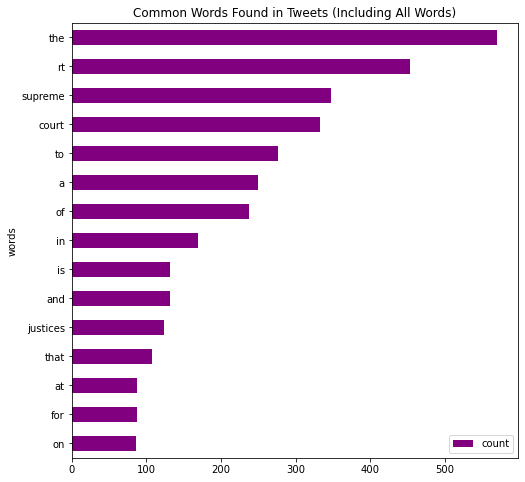

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [31]:
# step 4 get rid of garbage words (stopwords)
import nltk
from nltk.corpus import stopwords

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/wei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stop_words = set(stopwords.words('english'))

In [34]:
list(stop_words)

["you'll",
 'shouldn',
 'under',
 "you'd",
 'am',
 'just',
 'above',
 'about',
 'other',
 'and',
 'below',
 'my',
 'had',
 'doing',
 'during',
 'her',
 'ain',
 'this',
 'has',
 'were',
 'that',
 'himself',
 'whom',
 've',
 'hers',
 'or',
 'all',
 'have',
 'once',
 'for',
 'themselves',
 'is',
 'but',
 'weren',
 'too',
 'his',
 'of',
 'we',
 'why',
 'll',
 "hadn't",
 "weren't",
 "haven't",
 'me',
 'you',
 'a',
 'only',
 'on',
 "doesn't",
 'being',
 "couldn't",
 't',
 "it's",
 'wouldn',
 "shouldn't",
 'some',
 'don',
 'over',
 'your',
 'the',
 'been',
 'with',
 'how',
 'him',
 'she',
 'any',
 'o',
 'theirs',
 'against',
 'at',
 'nor',
 'didn',
 'myself',
 'hasn',
 "aren't",
 'further',
 'our',
 'there',
 'doesn',
 "didn't",
 'from',
 'wasn',
 'through',
 'as',
 'here',
 "wouldn't",
 'herself',
 "hasn't",
 'few',
 'mustn',
 'aren',
 'most',
 "wasn't",
 's',
 'yourselves',
 'such',
 'what',
 'out',
 'these',
 'after',
 'down',
 'couldn',
 'd',
 'them',
 "don't",
 "she's",
 'off',
 'yours',

In [35]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['rt',
 'lifenewshq',
 'federal',
 'us',
 'code',
 '1507',
 'prohibits',
 'mob',
 'protests',
 'intent',
 'influencing',
 'judgeviolators',
 'face',
 'fines',
 'andor',
 'impr']

In [36]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(20)

[('rt', 453),
 ('supreme', 348),
 ('court', 333),
 ('justices', 124),
 ('outside', 56),
 ('homes', 49),
 ('protesting', 46),
 ('time', 41),
 ('justice', 38),
 ('breaking', 35),
 ('abortion', 35),
 ('us', 30),
 ('youre', 30),
 ('law', 29),
 ('rights', 29),
 ('call', 28),
 ('thomas', 28),
 ('harassing', 27),
 ('think', 26),
 ('remember', 26)]

In [37]:
# step 5 remove collections words
collection_words = ['supreme', 'court', 'justices','people','trumps','rt']

In [38]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [39]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('outside', 56),
 ('homes', 49),
 ('protesting', 46),
 ('time', 41),
 ('justice', 38),
 ('breaking', 35),
 ('abortion', 35),
 ('us', 30),
 ('youre', 30),
 ('law', 29),
 ('rights', 29),
 ('call', 28),
 ('thomas', 28),
 ('harassing', 27),
 ('think', 26)]

In [40]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,outside,56
1,homes,49
2,protesting,46
3,time,41
4,justice,38


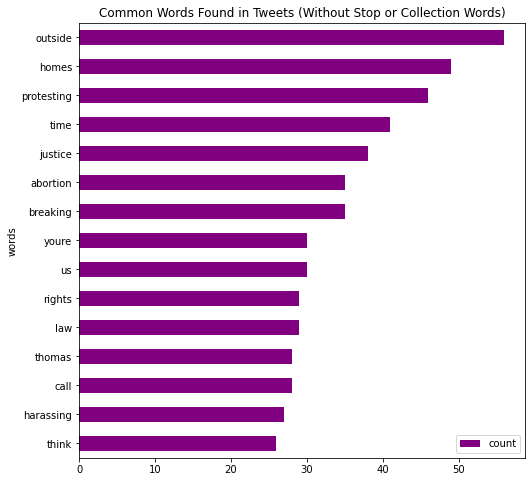

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [42]:
# bigram analysis
import networkx as nx
import seaborn as sns

In [43]:
from nltk import bigrams

In [44]:
import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [45]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('lifenewshq', 'federal'),
 ('federal', 'us'),
 ('us', 'code'),
 ('code', '1507'),
 ('1507', 'prohibits'),
 ('prohibits', 'mob'),
 ('mob', 'protests'),
 ('protests', 'intent'),
 ('intent', 'influencing'),
 ('influencing', 'judgeviolators'),
 ('judgeviolators', 'face'),
 ('face', 'fines'),
 ('fines', 'andor'),
 ('andor', 'impr')]

In [46]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('protesting', 'outside'), 44),
 (('outside', 'homes'), 28),
 (('thelawboy', 'discussing'), 23),
 (('discussing', 'propriety'), 23),
 (('propriety', 'protesting'), 23),
 (('homes', 'important'), 23),
 (('important', 'remember'), 23),
 (('good', 'morning'), 22),
 (('clarence', 'thomas'), 22),
 (('call', 'arms'), 20),
 (('outside', 'houses'), 19),
 (('roe', 'v'), 19),
 (('v', 'wade'), 18),
 (('ewarren', 'well'), 18),
 (('well', 'time'), 18),
 (('time', 'justice'), 18),
 (('justice', 'clarence'), 18),
 (('thomas', 'look'), 18),
 (('look', 'mirror'), 18),
 (('mirror', 'time'), 18)]

In [47]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(protesting, outside)",44
1,"(outside, homes)",28
2,"(thelawboy, discussing)",23
3,"(discussing, propriety)",23
4,"(propriety, protesting)",23
5,"(homes, important)",23
6,"(important, remember)",23
7,"(good, morning)",22
8,"(clarence, thomas)",22
9,"(call, arms)",20


In [48]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [49]:
d

[{('protesting', 'outside'): 44,
  ('outside', 'homes'): 28,
  ('thelawboy', 'discussing'): 23,
  ('discussing', 'propriety'): 23,
  ('propriety', 'protesting'): 23,
  ('homes', 'important'): 23,
  ('important', 'remember'): 23,
  ('good', 'morning'): 22,
  ('clarence', 'thomas'): 22,
  ('call', 'arms'): 20,
  ('outside', 'houses'): 19,
  ('roe', 'v'): 19,
  ('v', 'wade'): 18,
  ('ewarren', 'well'): 18,
  ('well', 'time'): 18,
  ('time', 'justice'): 18,
  ('justice', 'clarence'): 18,
  ('thomas', 'look'): 18,
  ('look', 'mirror'): 18,
  ('mirror', 'time'): 18}]

In [ ]:
# Last step: do sentiment analysis
pip install -U textblob

In [50]:
from textblob import TextBlob

In [51]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("RT LifeNewsHQ Federal US code 1507 prohibits mob protests with the intent of influencing any judgeViolators face fines andor impr"))

In [52]:
sentiment_objects[0].polarity, sentiment_objects[1]

(0.0,
 TextBlob("RT TomCottonAR The protestors who are harassing and threatening Supreme Court Justices at their homes are breaking the law Every one"))

In [53]:
sentiment_objects[0].polarity, sentiment_objects[2]

(0.0,
 TextBlob("RT AmoneyResists Good morning If youre feigning outrage over the impropriety of protesting outside justices houses you should know"))

In [54]:
sentiment_objects[0].polarity, sentiment_objects[10]

(0.0,
 TextBlob("RT risingserpent Forget trying to find who leaked the Supreme Court documents Joe Biden cant be bothered to even condemn it but dont"))

In [56]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0,
 'RT LifeNewsHQ Federal US code 1507 prohibits mob protests with the intent of influencing any judgeViolators face fines andor impr']

In [57]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.00,RT LifeNewsHQ Federal US code 1507 prohibits m...
1,0.00,RT TomCottonAR The protestors who are harassin...
2,0.35,RT AmoneyResists Good morning If youre feignin...
3,0.00,RT duty2warn In America any rapist can grow up...
4,0.25,RT thisisinsider The issue of reproductive fre...


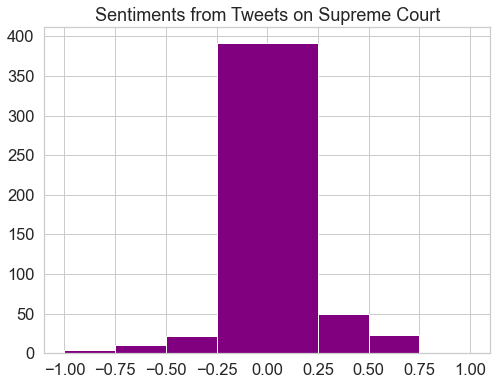

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Supreme Court")
plt.show()

In [59]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

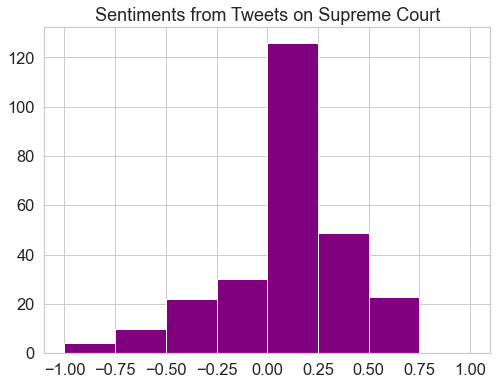

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Supreme Court")
plt.show()